# More on motion in 1-d
## Using Numpy's polynomial functionaility

An object's position is described by the following polynomial for 0 to 10 seconds, 
$$x = t^3 - 15t^2 + 54t$$.
1. Calculate  the object's velocity as a function of time.
2. Calculate the object's acceleration as a function of time
3. Find the object's maximum velocity.
4. Find the object's minimum velocity.
5. Find  the times when the object was moving backward.
6. Find the times when the object returned to its starting position.
7. Calculate the object's average velocity.
8. Calculate the object's average speed.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

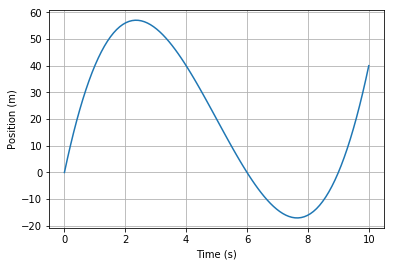

In [5]:
#  Define our polynomial that gives the position as a function of time
x = np.poly1d( [1, -15, 54, 0])

#  Plot the polynomial
t = np.linspace(0, 10, 100)
plt.plot(t, x(t))
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid(True)

Text(0.5, 1.0, 'Acceleraration')

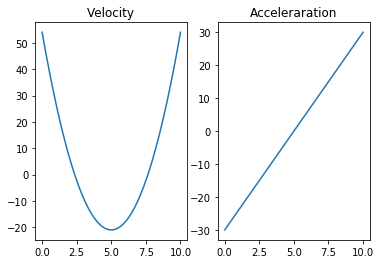

In [6]:
#  Numpy's library can take the derivative of a polynomial directly.  We differentiate once to get the velocity and again to get the acceleration.
v = x.deriv()
a = v.deriv()

#  Plot the velocity and acceleration
plt.subplot(1, 2, 1); plt.plot(t, v(t)); plt.title('Velocity')
plt.subplot(1, 2, 2); plt.plot(t, a(t)); plt.title('Acceleraration')

In [8]:
#  Find the min of the velocity.  Take its derivative (the acceleration) and find the root of that to get the time.
#  Plug that time into the veolcity polynomial to get the minimum
t_min = a.r[0]
print(t_min)
print( v(t_min))

#  Vecloty doesn't have a max per se.  Search the array for the largest value in our time window
print( np.amax( v(t)))

5.0
-21.0
54.0


In [12]:
#  Find the time when the velocity is less that zero
#  Since it starts off positive, we can do this by finding the roots of the veolcity polynomial
print( np.sort(v.r) )

[2.35424869 7.64575131]


In [9]:
#  Find the time the object returns to starting position.  Same idea, It starts at zero so find the roots
print( np.sort(x.r) )

[0. 6. 9.]


In [17]:
#  Built-on functions can also do integrals.  Calculate the average velocity
print((v.integ()(10) - v.integ()(0)) / 10)

#  Compare with numerical integration
print( np.trapz(v(t), t) / 10 )

4.0
4.005101520253034


In [18]:
#  Use numerical integration to get the average speed
print( np.trapz( np.abs(v(t)), t) / 10 )

18.82278555373138
